In [1]:
#Importemos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ahora importemos el dataset de Titanic
df = pd.read_csv('titanic_train.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum() #También podríamos usar df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#A veces es mejor considerar el porcentaje de valores nulos
df.isnull().sum()/len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

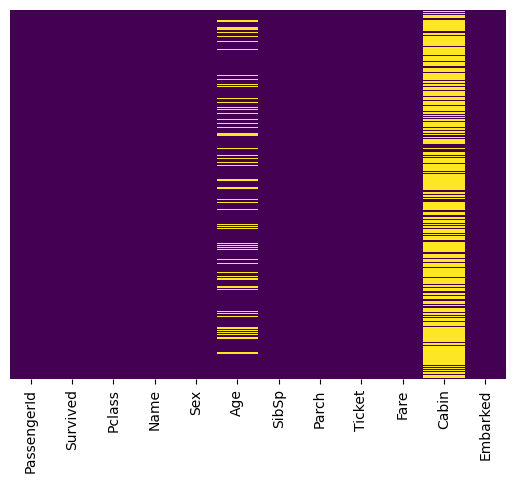

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

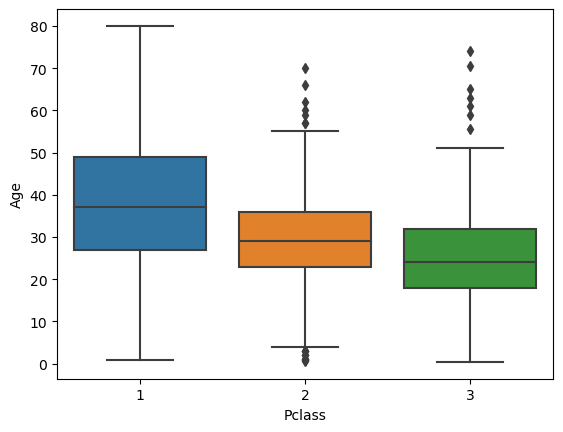

In [8]:
sns.boxplot(x = 'Pclass', y='Age', data=df)

In [9]:
df.groupby('Pclass').mean()['Age']

C:\Users\jeanp\AppData\Local\Temp\ipykernel_33368\328810730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [10]:
def imputar_edad(columnas):
    
    edad = columnas[0]
    clase = columnas[1]
    
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase==2:
            return 30
        else:
            return 25
    else:
        return edad

In [11]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis=1)

<Axes: >

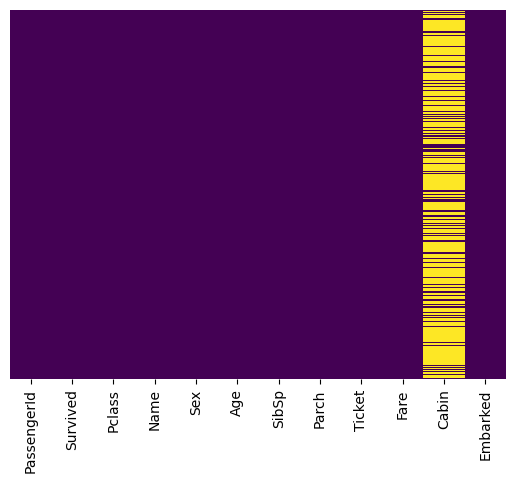

In [12]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
df.drop(columns = ['Cabin'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [17]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [20]:
#Vamos a prepararnos para entrenar el modelo
columnas_eliminar = ['PassengerId','Survived','Name', 'Ticket']

X = df.drop(columns = columnas_eliminar)
y = df['Survived']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
#Ahora, lidiemos con las variables categóricas; para regresión logística, las magnitudes no son tan importantes
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [24]:
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [25]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [26]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [27]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [28]:
col_transformer.fit(X_train)

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B3D47721D0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B3D4771D50>)])

In [29]:
X_train_preprocesadas = col_transformer.transform(X_train)
X_test_preprocesadas = col_transformer.transform(X_test)

In [30]:
col_transformer.get_feature_names_out()

array(['standardscaler__Pclass', 'standardscaler__Age',
       'standardscaler__SibSp', 'standardscaler__Parch',
       'standardscaler__Fare', 'onehotencoder__Sex_female',
       'onehotencoder__Sex_male', 'onehotencoder__Embarked_C',
       'onehotencoder__Embarked_Q', 'onehotencoder__Embarked_S'],
      dtype=object)

In [31]:
variables = []

for nombre_variable in list(col_transformer.get_feature_names_out()):
    
    nombre_variable_correcto = nombre_variable.replace('standardscaler__', '').replace('onehotencoder__','').replace('remainder__','')
    
    variables.append(nombre_variable_correcto)
    
variables

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [32]:
X_train_df = pd.DataFrame(X_train_preprocesadas, columns = variables, index = X_train.index)
X_test_df = pd.DataFrame(X_test_preprocesadas, columns = variables, index = X_test.index)

In [33]:
X_train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
806,0.825812,-0.876228,-0.484080,-0.466368,-0.481863,1.0,0.0,0.0,0.0,1.0
650,-0.363204,-0.876228,-0.484080,0.768019,-0.184331,1.0,0.0,0.0,0.0,1.0
2,0.825812,-0.253644,-0.484080,-0.466368,-0.478932,1.0,0.0,0.0,0.0,1.0
689,-1.552221,0.135471,0.439533,-0.466368,0.480109,0.0,1.0,0.0,0.0,1.0
195,0.825812,-0.331467,-0.484080,-0.466368,-0.482352,0.0,1.0,0.0,1.0,0.0


In [34]:
#Pasemos a entrenar el modelo:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()

logmodel.fit(X_train_df, y_train)

LogisticRegression()

In [36]:
y_pred = logmodel.predict(X_test_df)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [37]:
logmodel.predict_proba(X_test_df)

array([[0.89396122, 0.10603878],
       [0.87337906, 0.12662094],
       [0.2314236 , 0.7685764 ],
       [0.07515463, 0.92484537],
       [0.87210116, 0.12789884],
       [0.96755155, 0.03244845],
       [0.88694745, 0.11305255],
       [0.77254629, 0.22745371],
       [0.92730707, 0.07269293],
       [0.40703679, 0.59296321],
       [0.21059645, 0.78940355],
       [0.04275255, 0.95724745],
       [0.89398292, 0.10601708],
       [0.39147827, 0.60852173],
       [0.89375698, 0.10624302],
       [0.87270125, 0.12729875],
       [0.08277982, 0.91722018],
       [0.16246912, 0.83753088],
       [0.44595309, 0.55404691],
       [0.90158162, 0.09841838],
       [0.89387498, 0.10612502],
       [0.91391088, 0.08608912],
       [0.59635617, 0.40364383],
       [0.6813756 , 0.3186244 ],
       [0.94536927, 0.05463073],
       [0.54445378, 0.45554622],
       [0.35709144, 0.64290856],
       [0.50324608, 0.49675392],
       [0.88118893, 0.11881107],
       [0.68370589, 0.31629411],
       [0.

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

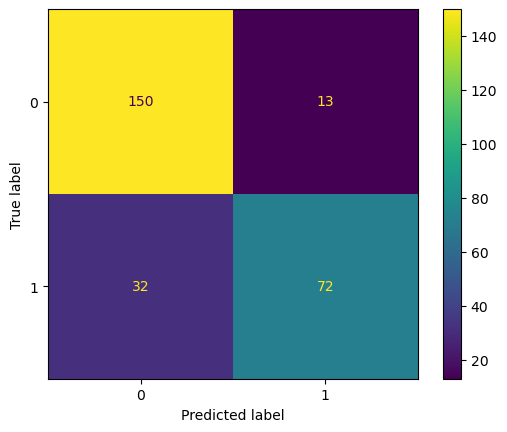

In [51]:
disp.plot()

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [54]:
y_train_pred = logmodel.predict(X_train_df)

In [55]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       386
           1       0.77      0.71      0.74       236

    accuracy                           0.81       622
   macro avg       0.80      0.79      0.79       622
weighted avg       0.81      0.81      0.81       622

